# 19 基于 `K-means` 的手写数字聚类分析


- 重点
    - `K-means`（`K-平均聚类`）算法


- 其它
    - `AP` —— Affinity propagation Clustering Algorithm，亦称仿射传播聚类算法、近邻传播聚类算法、亲和传播聚类算法
    - `MeanShift` —— 亦称`均值漂移算法`，是一种基于核密度估计的爬山算法
    - `GMM` —— Gaussian Mixture Model，亦称`高斯混合模型聚类算法`

- 导入模块

In [1]:
%pylab inline
import IPython

import sklearn as sk
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sk.__version__)
print ('matplotlib version:', matplotlib.__version__)
print ('pandas version:', pd.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 7.8.0
numpy version: 1.19.5
scikit-learn version: 0.24.1
matplotlib version: 3.1.1
pandas version: 0.25.1


## 19.1 `K-平均聚类` 算法 —— 简介


- 最常用的聚类算法
    - 简单、易用、良好表现

### 19.1.1 `K-平均聚类` 算法的目的


- 进行样本分类
    - 把 $n$ 个点（样本实例）划分到 $k$ 个聚类中，使得每个点都属于离它最近的<font color="red">聚类中心 (均值) </font>对应的聚类

#### 例 —— 车队司机数据 (fleet driver data)


- 取自 [datascience 数据](https://www.datascience.com/blog/k-means-clustering)
- [数据集](data/fleet_driver_dataset.csv)

In [3]:
# 看一下数据
!type fleet_driver_dataset.csv

Driver_ID	Distance_Feature	Speeding_Feature
3423311935	71.24	28.0
3423313212	52.53	25.0
3423313724	64.54	27.0
3423311373	55.69	22.0
3423310999	54.58	25.0
3423313857	41.91	10.0
3423312432	58.64	20.0
3423311434	52.02	8.0
3423311328	31.25	34.0
3423312488	44.31	19.0
3423311254	49.35	40.0
3423312943	58.07	45.0
3423312536	44.22	22.0
3423311542	55.73	19.0
3423312176	46.63	43.0
3423314176	52.97	32.0
3423314202	46.25	35.0
3423311346	51.55	27.0
3423310666	57.05	26.0
3423313527	58.45	30.0
3423312182	43.42	23.0
3423313590	55.68	37.0
3423312268	55.15	18.0
3423314255	43.84	22.0
3423311976	59.26	32.0
3423312669	37.14	41.0
3423310697	64.3	29.0
3423312113	45.75	16.0
3423313343	45.97	23.0
3423311431	56.04	39.0
3423310755	33.64	45.0
3423311821	41.67	33.0
3423314359	50.68	39.0
3423313106	54.22	35.0
3423310754	56.2	29.0
3423310524	46.16	41.0
3423311780	50.22	24.0
3423312156	49.66	33.0
3423312916	38.61	37.0
3423310588	55.28	36.0
3423312995	57.87	41.0
3423313389	61.69	12.0
3423311369	37.41	21.0
3423311408	53

3423310582	56.72	7.0
3423313956	52.33	4.0
3423312579	47.04	7.0
3423313263	45.59	6.0
3423311374	45.47	5.0
3423314207	50.18	3.0
3423310871	38.85	8.0
3423312920	51.57	3.0
3423310763	56.38	1.0
3423314218	43.52	8.0
3423310714	53.46	5.0
3423310625	45.74	4.0
3423311755	46.48	6.0
3423313620	50.63	8.0
3423313898	43.06	3.0
3423312192	34.77	4.0
3423310485	47.34	5.0
3423311469	59.12	11.0
3423313663	41.22	4.0
3423311211	46.41	10.0
3423313639	45.58	4.0
3423312415	45.28	7.0
3423314069	55.43	6.0
3423313569	54.32	4.0
3423311805	40.04	3.0
3423312851	62.46	5.0
3423312423	60.24	4.0
3423310887	54.78	6.0
3423314192	52.11	4.0
3423313163	46.1	6.0
3423310700	46.13	9.0
3423311304	45.62	5.0
3423312122	56.74	3.0
3423314310	42.62	4.0
3423312810	74.88	7.0
3423314096	33.22	3.0
3423313978	39.93	4.0
3423313243	60.35	2.0
3423314127	54.66	4.0
3423312463	34.96	6.0
3423310631	58.1	8.0
3423311753	46.64	2.0
3423313430	63.0	6.0
3423312330	48.1	9.0
3423312904	38.66	3.0
3423312018	48.91	0.0
3423312641	63.5	4.0
3423313056	44.26

3423311999	182.16	6.0
3423312965	199.42	8.0
3423311467	172.99	10.0
3423311074	182.44	10.0
3423310814	166.96	8.0
3423311459	153.58	12.0
3423310920	185.68	18.0
3423311219	214.8	20.0
3423310460	185.39	20.0
3423314058	169.35	19.0
3423313313	181.75	10.0
3423311165	159.89	17.0
3423310652	196.52	12.0
3423311383	169.65	14.0
3423313327	192.21	8.0
3423313079	180.29	20.0
3423312932	222.08	11.0
3423311728	165.1	13.0
3423314434	212.75	9.0
3423311292	170.64	13.0
3423314315	196.2	14.0
3423310889	189.99	12.0
3423310851	208.96	10.0
3423313381	219.39	1.0
3423311448	188.25	10.0
3423311551	187.13	12.0
3423313834	187.28	8.0
3423312123	192.74	13.0
3423310590	211.2	8.0
3423312146	189.88	9.0
3423312648	165.58	6.0
3423310473	191.88	7.0
3423312226	194.22	12.0
3423310647	167.22	2.0
3423311832	185.37	14.0
3423311103	203.8	22.0
3423311192	167.05	10.0
3423314043	177.48	19.0
3423312391	170.22	16.0
3423312567	209.76	18.0
3423310685	160.04	10.0
3423312600	176.17	5.0
3423312921	170.91	12.0
3423313630	176.14	5.0
3423311

- 标识
    - Driver_ID —— 驾驶员编号

- 两个特征
    - Distance_Feature —— 每天的平均行车距离
    - Speeding_Feature —— 时间百分比（速度超出限速 5 mph）

In [8]:
fleet_driver_data_df = pd.read_csv('fleet_driver_dataset.csv')
fleet_driver_data_df.head()

,Driver_ID\tDistance_Feature\tSpeeding_Feature
0,3423311935\t71.24\t28.0
1,3423313212\t52.53\t25.0
2,3423313724\t64.54\t27.0
3,3423311373\t55.69\t22.0
4,3423310999\t54.58\t25.0


In [9]:
fleet_driver_data_df = pd.read_csv('fleet_driver_dataset.csv', sep="\t")#分隔符用制表符代替
fleet_driver_data_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [10]:
fleet_driver_data_df.tail()

,Driver_ID,Distance_Feature,Speeding_Feature
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0
3999,3423311533,168.03,9.0


#### (1) 画散点图

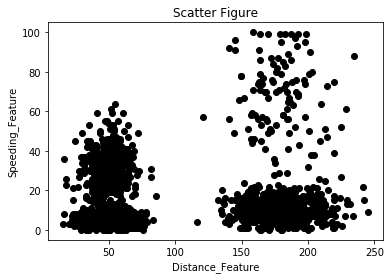

In [11]:
plt.scatter(fleet_driver_data_df['Distance_Feature'], fleet_driver_data_df['Speeding_Feature'], color='k')

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.title('Scatter Figure');

#### (2) 二聚类图 —— 两个中心


- 分析过程略

<img src="images/k-means_from_datascience-02.png">

#### (3) 四聚类图 —— 四个中心


- 分析过程略

<img src="images/k-means_from_datascience-04.png">

### 19.1.2 `K-聚类算法` 的前提


- 预先知道聚类数量 $K$
- 提供初始的聚类中心

### 19.1.3 `K-平均聚类分析` 的步骤 


- `K-平均聚类分析` 的流程 
    - (1) 随机选择初始的聚类中心集合
    - (2) 对每个样本点，寻找最近的聚类中心，并将该样本点`归属于最近的聚类`
    - (3) 平均聚类的样本值，得到新的聚类中心
    - (4) 重复(1)(2)(3)步骤，直到稳定（收敛）


- 所谓稳定
    - 每一次重复迭代，没有（或仅少数）样本改变其聚类

### 19.1.4 可能存在的问题 —— 收敛结果受初始选择影响


- 显著影响最终收敛结果的因素
    - 初始聚类中心的选择


- 希望
    - 收敛结果 与 初始聚类中心点的选择无关


- 怎么办？

### 19.1.5 选取初始聚类中心的若干方法


- 随机选择法 —— 随机选择 `K` 个初始中心
- 最小最大法
    - 首先选择距离最远的两个点作为初始聚点
    - 选取第三个聚点，使它与前面已确定的聚点的最小距离比其它的点都大
    - 以此类推
- 最小距离法
    - 确定正数 $r$   最为关键，取得不好则有可能花费时间长或者不收敛
    - 取所有点的中心作为第一个聚点
    - 寻找点与已知聚点的距离都大于 $r$，作为下一个聚点
    - 以此类推
- `scikit-learn` 如何解决前述问题
    - 选取 `若干组` 初始聚类中心集合
    - 计算 `聚类中心之间距离的平方和`
    - 取最小的那一组 —— 体现凝聚程度

### 19.1.6 `KMeans` 类与对象


- 语法
```python
>>> cluster.KMeans(n_clusters=8, init='k-means++', n_init=10,
                   max_iter=300, tol=0.0001, precompute_distances='auto',
                   verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
```


- 功能 —— 创建 `K-平均聚类分析` 对象


- 参数
    - `n_clusters` 指定多少组聚类
    - `init` 指定初始化方法
        - 'k-means++'(缺省)：智能方式选择聚类中心，以加快收敛
        - 'random'：随机选择 k 行作为初始中心
        - ndarray：维度为(n_clusters, n_features)的数组，指定初始聚类中心
    - `n_init` 指定 `K-平均聚类算法` 的计算次数，每次随机取不同的中心种子，结果取最佳输出

In [12]:
from sklearn import cluster

In [41]:
cluster.KMeans?

In [14]:
km = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

## 19.2 基于 `K-聚类算法` 的手写数字识别


- [第18讲课件](../第18讲-无监督学习-主成分分析/第18讲%20无监督学习-主成分分析.ipynb)
    - 问题背景
    - 数据集介绍

### 19.2.1 导入观察数据集

#### (1) 加载数据集


- 语法
```python
>>> sklearn.datasets.load_digits(n_class=10, return_X_y=False)
```


- 功能 —— 加载数据集


- 参数
    - n_class：返回类别数，缺省值 10

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### (2) `digits.images` 和 `digits.data` 本质上一样

In [17]:
digits.data.shape

(1797, 64)

In [18]:
digits.images.shape

(1797, 8, 8)

In [19]:
print(digits.data[0])
print(digits.images[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


#### (3) `scale` —— 标准化函数

- 语法
```python
>>> sklearn.preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
```


- 功能
    - 沿指定轴标准化数据集
    - 以平均值为中心
    - 单位方差


- 参数
    - X —— 数组，或稀疏矩阵
    - axis —— 缺省值 0：标准化特征；1：标准化样本
    - with_mean —— 缺省值 True：中心化
    - with_std —— 缺省值 True：单位标准差
    - copy —— 缺省值 True：拷贝

In [20]:
from sklearn.preprocessing import scale

digits.data = scale(digits.data)
digits.data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [21]:
# 查看
digits.data.mean(0)

array([ 0.00000000e+00, -2.56086502e-16, -2.34771702e-16, -3.05326777e-16,
        1.39689163e-16, -3.16941798e-16, -9.59598443e-16,  6.06946633e-16,
       -4.62368967e-16,  7.55084971e-17, -5.33796713e-17,  5.71483749e-17,
        4.52862258e-17, -1.49512505e-17,  8.96580775e-16, -2.17719863e-16,
       -6.87973761e-16, -7.70421876e-17,  2.59978769e-16,  2.32547550e-16,
        1.05878949e-16, -1.40863021e-16, -1.15408826e-16, -2.26477465e-16,
        4.51109193e-16,  3.79341646e-17, -7.71657517e-17, -9.60092699e-17,
       -8.72980041e-17, -1.50624582e-16, -1.05597840e-15, -2.52140175e-16,
        0.00000000e+00,  3.42148865e-16,  1.21710593e-16, -1.07871419e-16,
       -2.00606242e-16, -1.09354188e-17, -7.12964591e-17,  0.00000000e+00,
        3.00716294e-16, -1.74657790e-16,  4.03436636e-16,  1.92111213e-16,
        2.61337974e-17,  5.38739275e-17,  4.71396866e-17,  8.63759074e-16,
        2.62048467e-16,  3.33128689e-16,  8.36528645e-17,  1.98775949e-16,
        4.61017485e-16,  

In [22]:
digits.data.std(0)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### (3) 显示图片

In [23]:
def print_digits(images, y, max_n=10):
    # 图片尺寸
    fig = plt.figure(figsize=(12, 12)) # 宽，高，英寸为单位
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i <max_n and i <images.shape[0]:
        # 绘图
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # 标记
        p.text(0, 14, str(y[i]))
        i = i + 1

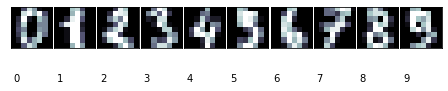

In [24]:
print_digits(
    digits.images, # 图象
    digits.target, # 目标值，用于标注
    max_n=10       # 10 张
)

- 上图可以看到图片和标记的目标值

### 19.2.2 数据集拆分

#### (1) 导入拆分函数

In [25]:
from sklearn.model_selection import train_test_split

#### (2) 拆分 3 个数组 `digits.data`、 `digits.target`、 `digits.images`

In [26]:
# 拆分数组
X_train,      X_test,\
y_train,      y_test,\
images_train, images_test = train_test_split(  digits.data,
                                               digits.target,
                                               digits.images,
                                               test_size=0.25, random_state=42)

In [27]:
n_samples, n_features = X_train.shape
n_samples, n_features

(1347, 64)

In [28]:
n_digits = len(np.unique(y_train))
n_digits

10

In [29]:
labels = y_train
labels

array([5, 2, 0, ..., 2, 7, 1])

### 19.2.3 实行 `K-平均聚类算法`

In [30]:
dir(km)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'init',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [31]:
km.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [32]:
dir(km)  # 多了若干属性，如 cluster_centers_、inertia_、labels_ 等

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict'

#### (1) 与有监督学习算法的异同


- 相同之处 —— 调用 `fit` 函数


- 不同之处
    - `fit` 函数仅有一个训练数据参数
    - 要预先指定聚类数

#### (2) 输出分类器的 `labels_` 属性

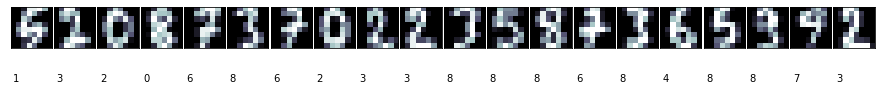

In [33]:
print_digits(images_train, km.labels_, max_n=20)

#### (3) 观察上述输出图形


- 聚类编号采用了数字（都不是实际标识数）


- 强调
    - 画上述图并没有用到分类标识
    - 只是根据相似性来进行分组

#### (4) 分类器的聚类中心

In [34]:
km.cluster_centers_.shape

(10, 64)

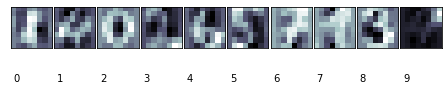

In [35]:
print_digits(km.cluster_centers_.reshape(10,8,8), range(10), max_n=10)

#### (5) 用测试集来检验


- 调用 `predict` 成员函数

In [42]:
y_pred = km.predict(X_test)
y_pred

array([4, 8, 8, 9, 3, 3, 5, 8, 5, 3, 0, 7, 1, 2, 1, 3, 8, 6, 8, 8, 1, 5,
       8, 6, 5, 4, 8, 5, 4, 8, 1, 8, 3, 1, 1, 4, 8, 1, 6, 4, 4, 8, 0, 8,
       4, 7, 8, 2, 4, 5, 5, 0, 8, 5, 4, 2, 8, 2, 2, 7, 2, 1, 5, 3, 1, 5,
       6, 2, 6, 8, 8, 8, 8, 6, 6, 2, 1, 5, 8, 8, 8, 2, 3, 8, 8, 2, 4, 1,
       1, 8, 0, 3, 7, 8, 8, 3, 8, 2, 1, 1, 1, 8, 5, 8, 7, 6, 5, 7, 1, 3,
       6, 6, 1, 1, 7, 8, 0, 6, 8, 6, 3, 4, 8, 7, 2, 6, 3, 6, 5, 0, 5, 5,
       6, 7, 2, 4, 4, 1, 3, 0, 2, 8, 1, 4, 8, 7, 4, 8, 2, 8, 8, 4, 4, 2,
       4, 1, 3, 8, 8, 6, 6, 3, 8, 2, 1, 5, 0, 4, 5, 6, 8, 0, 1, 0, 0, 8,
       6, 6, 3, 3, 8, 8, 8, 2, 8, 0, 3, 5, 4, 8, 8, 1, 0, 5, 9, 3, 8, 4,
       1, 0, 8, 8, 5, 6, 0, 8, 1, 0, 0, 5, 1, 1, 8, 4, 0, 8, 4, 2, 1, 5,
       3, 6, 7, 4, 1, 5, 4, 2, 8, 3, 8, 4, 6, 7, 8, 3, 1, 6, 4, 5, 0, 8,
       5, 0, 2, 3, 0, 0, 6, 5, 6, 4, 3, 3, 3, 8, 1, 0, 5, 8, 4, 2, 8, 6,
       6, 2, 0, 2, 1, 8, 0, 5, 8, 4, 2, 1, 3, 2, 2, 8, 4, 8, 8, 6, 8, 5,
       8, 8, 8, 0, 5, 8, 8, 7, 2, 5, 0, 8, 1, 2, 3,

#### (6) 定义画图函数并执行


- 语法
```python
>>> print_cluster(images, y_pred, cluster_number)
```


- 功能 —— 按聚类画图


- 参数
    - images 图象
    - y_pred 测试类别值
    - cluster_number 聚类编号

In [36]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number] #numpy布尔掩码
    print_digits(images, y_pred, max_n=10)

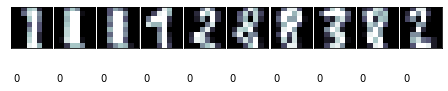

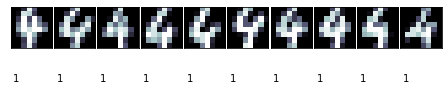

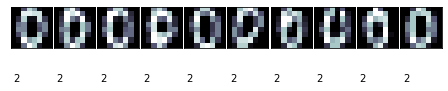

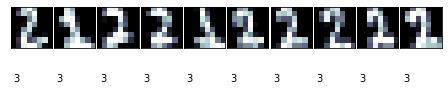

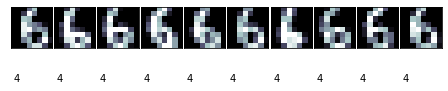

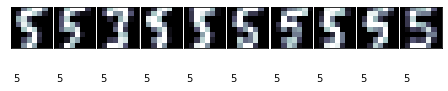

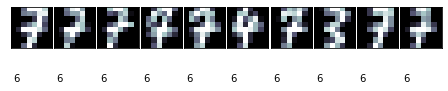

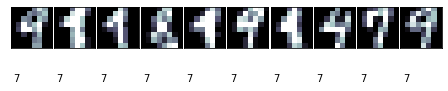

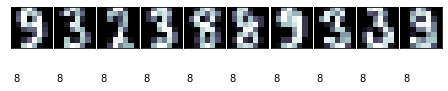

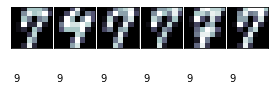

In [39]:
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [40]:
# 查询标识为4的图片
images_test[y_pred==4]

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 14., ...,  0., 12.,  0.],
        [ 0.,  0.,  8., ...,  5., 16.,  2.],
        [ 0.,  0.,  0., ..., 14.,  5.,  0.]],

       [[ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0., 13., ...,  0.,  0.,  0.],
        [ 0.,  0., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  4., 16., ..., 16.,  7.,  0.],
        [ 0.,  1., 14., ..., 11., 15.,  0.],
        [ 0.,  0.,  5., ..., 12.,  6.,  0.]],

       [[ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  3., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  4., 16., ...,  9., 11.,  0.],
        [ 0.,  0., 14., ..., 13.,  9.,  0.],
        [ 0.,  0.,  5., ..., 12.,  1.,  0.]],

       ...,

       [[ 0.,  0.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0., 16., ...,  0.,  0.,  0.

#### (7) 观察输出


- 每个聚类显示至多 10 个图片
- 有些聚类非常清晰， 如数字 0 对应的聚类
- 数字 1 和 9 易混淆
- 有的聚类只有 6 个实例
- 甚至有聚类没有实例

#### (8) 小结


- 上面取聚类数为 10
- 完成了数字聚类分析，但不能说成功（回顾一下人脸识别问题的效果，比这里的结果要好许多）
- 如果取聚类数小于 10，会如何呢？

## 19.3 聚类效果评价指标

### 19.3.1 聚类效果评价面临困难


- 问题
    - 如何评价聚类算法的效果呢？


- 注意
    - 由于没有目标标识，因此`类似于有监督学习那样的效果评价`无从实现


- 需要`聚类效果评价指标`

### 19.3.2 `RI` 聚类指标 (亦称 兰德指标) —— `Rand Index`


$$RI = \dfrac{a+b}{a+b+c+d}$$


- 符号说明
    - $a$ 应该属于同一类，也聚在了同一类的样本配对数量
    - $b$ 不应该属于同一类，也没聚在同一类的样本配对数量
    - $c$ 应该属于同一类，却没有聚在同一类的样本配对数量
    - $d$ 不应该属于同一类，却聚在了同一类的样本配对数量


- 说明
    - $a$ 和 $b$ 是正确配对数
    - $c$ 和 $d$ 是错误配对数


- $RI$ 的意义
    - $0\le RI\le 1$
    - $RI$ 越接近 0，精度越差
    - $RI$ 越接近 1，精度越好


- 什么叫`样本配对数量`？
    - 根据两个样本的聚类关系来判断


- 公式变化（注意分母是所有配对的总和）
$$RI = \dfrac{a+b}{a+b+c+d}=\dfrac{a+b}{C_n^2}$$


- $RI$ 的缺点 —— 聚类错误的惩罚力度不够

### 19.3.3 `ARI` 调整聚类指标 —— `Adjusted Rand Index`


#### (1) 调整兰德指标 (`ARI`) —— 公式说明参考[维基百科](https://en.wikipedia.org/wiki/Rand_index)

<img src="ari.svg" width=400>

 
或

$$ARI = \dfrac{RI - Expected\_RI}{\max(RI) - Expected\_RI}$$


#### (2) 补充说明

- 公式中符号 $n_{ij}$、 $a_{i}$ 和 $b_{j}$ 的含义如下表
<img src="images/ari_table.png" width=500>


- $n_{ij}$ 表示实际是 $j$ 类，但聚在了 $i$ 类的样本数量


- $C_n^2 = \binom{n}{2}$


- `ARI` 是对 `RI` 进行改进后的度量精度指标
    - $-1\le ARI \le 1$，值越大意味着聚类结果与真实情况越吻合


- 它考虑了类别可以有不同的命名
    - 如果改变类别的命名，`ARI` 不会变

### 19.3.4 聚类效果评价

#### (1) 计算得分

- 调用函数
```python
>>> sklearn.metrics.adjusted_rand_score(labels_true, labels_pred) # 计算 ARI
>>> sklearn.metrics.homogeneity_score(labels_true, labels_pred)  # 计算同质性得分
>>> sklearn.metrics.completeness_score(labels_true, labels_pred) # 计算完整性得分
```

#### 例 计算 `ARI`

In [43]:
# 导入模块
from sklearn.metrics import adjusted_rand_score

- 函数 `adjusted_rand_score` 的用法

```python
>>> adjusted_rand_score(labels_true, labels_pred)
```

- 参数
    - labels_true : int array, shape = [n_samples]
    - labels_pred : array-like of shape (n_samples,)


- 返回值 —— `ARI`

In [44]:
# 正确聚类，命名也相符
adjusted_rand_score(
    [0, 0, 1, 1],
    [0, 0, 1, 1]
)

1.0

In [45]:
# 正确聚类，命名也相符
adjusted_rand_score(
    [0, 0, 1, 1],
    [2, 2, 1, 1]
)

1.0

In [46]:
# 聚类正确，命名不同
adjusted_rand_score(
    [0, 0, 1, 1],
    [2, 2, 0, 0]
)

1.0

In [47]:
# 不正确聚类，命名也相符
adjusted_rand_score(
    [0, 0, 1, 1],
    [0, 0, 0, 1]
)

0.0

In [48]:
# 聚类不正确，命名不同
adjusted_rand_score(
    [0, 0, 1, 1],
    [0, 1, 1, 0]
)

-0.5

#### (2) 案例计算得分

In [49]:
from sklearn import metrics

In [50]:
print ("调整兰德分: {:.2}".format(metrics.adjusted_rand_score  (y_test, y_pred)))
print ("同质性得分: {:.2} ".format(metrics.homogeneity_score   (y_test, y_pred))) 
print ("完整性得分: {:.2} \n".format(metrics.completeness_score(y_test, y_pred)))

print ("混淆矩阵")
print (metrics.confusion_matrix(y_test, y_pred))

调整兰德分: 0.57
同质性得分: 0.69 
完整性得分: 0.73 

混淆矩阵
[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


#### (3) 结合 `PCA` 的聚类分析与图示（自阅）

In [51]:
# 导入模块
from sklearn import decomposition

In [52]:
# 主成分分析
pca = decomposition.PCA(n_components=2).fit(X_train)

reduced_X_train = pca.transform(X_train)
reduced_X_train

array([[ 3.76668595, -0.13888018],
       [-6.81448777,  0.12760667],
       [ 1.92097651, -2.25051417],
       ...,
       [-1.52322476,  2.36679281],
       [ 1.74870484,  1.68086218],
       [ 0.26637388, -0.61006367]])

In [53]:
# 拟取前2个主成分画图，确定坐标界限
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1

h = .01  # 步长
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [54]:
# K-平均聚类分析 对象
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)

KMeans(n_clusters=10)

In [55]:
# 预测
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

In [56]:
kmeans.cluster_centers_

array([[ 0.93798877, -4.10602266],
       [-2.68624593,  1.97144277],
       [ 2.23566454,  1.5028288 ],
       [-5.30233029, -0.97917339],
       [-0.53195687,  0.34647743],
       [ 4.978902  , -1.40603899],
       [ 0.50018329,  3.64135057],
       [ 1.78273644, -1.50708596],
       [-2.55979989, -0.96260793],
       [ 5.210474  ,  5.37632372]])

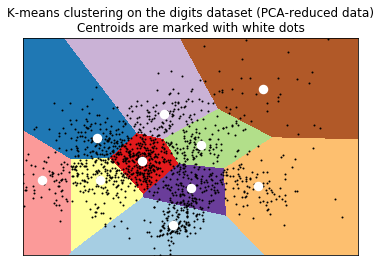

In [57]:
# 画图
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

# 样本散点图
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         'Centroids are marked with white dots')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

## 19.4 其它聚类分析方法


- `scikit-learn` 模块中有若干聚类分析算法类
- 它们与 `K-means` 在参数和成员函数方面相类似

### 19.4.1 聚类算法的普遍问题


- 要求预先知道聚类数


- 解决办法
    - 尝试多个聚类数，然后专家评判哪个聚类数的效果最好
    - 采用自动计算聚类数的算法

### 19.4.2 `AP (Affinity Propagation)`  近邻（亲和）传播聚类算法


- 优点 —— 不需要预先指定聚类数
- 缺点 —— 时间复杂度和空间复杂度都比较高

#### (1)  生成算法对象并训练

In [58]:
aff = cluster.AffinityPropagation()
aff.fit(X_train)

C:\Users\solit\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


AffinityPropagation()

#### (2) 输出对象属性

In [59]:
dir(aff)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'affinity',
 'affinity_matrix_',
 'cluster_centers_',
 'cluster_centers_indices_',
 'convergence_iter',
 'copy',
 'damping',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'predict',
 'preference',
 'random_state',
 'set_params',
 'verbose']

In [60]:
aff.cluster_centers_indices_

array([   3,   14,   57,   58,   93,  113,  114,  159,  170,  180,  192,
        204,  209,  246,  252,  256,  262,  288,  318,  325,  338,  355,
        367,  373,  391,  419,  430,  445,  449,  451,  460,  483,  504,
        542,  559,  564,  577,  587,  596,  612,  614,  625,  629,  641,
        647,  648,  654,  659,  689,  733,  735,  736,  753,  762,  782,
        783,  795,  804,  806,  808,  812,  820,  828,  846,  847,  855,
        881,  885,  900,  918,  930,  947,  956,  986,  989,  990,  991,
       1016, 1024, 1037, 1041, 1050, 1056, 1057, 1066, 1071, 1092, 1105,
       1119, 1138, 1149, 1160, 1169, 1175, 1186, 1194, 1196, 1203, 1206,
       1208, 1210, 1211, 1218, 1222, 1235, 1284, 1296, 1308, 1314, 1321,
       1332, 1343], dtype=int64)

In [61]:
print (X_train.shape)
print (aff.cluster_centers_indices_.shape)

(1347, 64)
(112,)


#### (3) 画聚类中心图

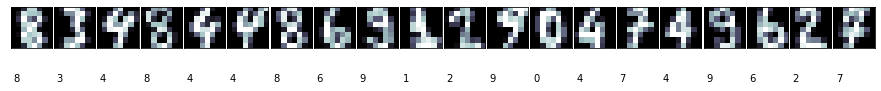

In [62]:
print_digits(images_train[aff.cluster_centers_indices_], y_train[aff.cluster_centers_indices_],
             max_n=20)

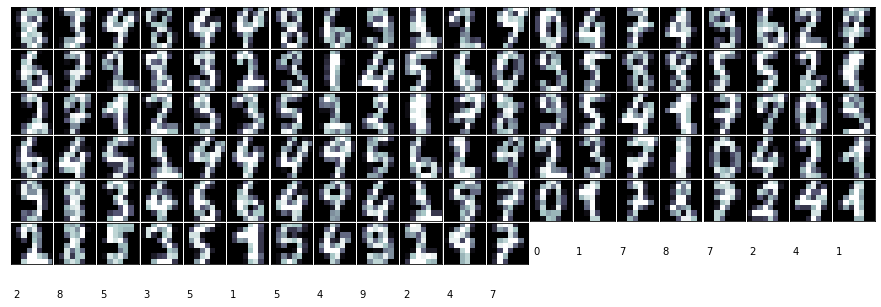

In [63]:
print_digits(images_train[aff.cluster_centers_indices_], y_train[aff.cluster_centers_indices_],
             max_n=aff.cluster_centers_indices_.shape[0])

#### (4) 小结


- 好惊讶
    - 有 112 个聚类

### 19.4.3 `MeanShift` 均值漂移聚类算法

#### (1)  生成算法对象并训练

In [ ]:
ms = cluster.MeanShift()
ms.fit(X_train)

#### (2) 输出对象属性

In [ ]:
dir(ms)

In [ ]:
ms.cluster_centers_

In [ ]:
print (X_train.shape)
print (ms.cluster_centers_.shape)

#### (3) 小结


- 仍有 18 个聚类

### 19.4.4 高斯混合聚类算法 `GMM (Gaussian Mixture Model)`

#### (1) `GMM` 与 `K-means` 比较


- 共性 —— 程序上与 `K-means` 相类似

- 个性 —— 一种随机聚类算法
    - `GMM` 假设样本数据服从高斯分布，参数待定

In [64]:
# 拆分数据集
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42)

In [65]:
from sklearn import mixture

# 多种协方差类型循环
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GaussianMixture(n_components=n_digits, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print ("ARI 得分: {0:.3}，协方差={1}".format(metrics.adjusted_rand_score(y_test_heldout, y_pred), covariance_type))

ARI 得分: 0.453，协方差=spherical
ARI 得分: 0.433，协方差=tied
ARI 得分: 0.375，协方差=diag
ARI 得分: 0.397，协方差=full


#### (2) 训练

In [66]:
gm = mixture.GaussianMixture(n_components=n_digits, covariance_type='tied', random_state=42)
gm.fit(X_train)

GaussianMixture(covariance_type='tied', n_components=10, random_state=42)

ARI 得分:0.456
同质得分:0.617 
完整性得分: 0.679 
混淆矩阵
[[ 1  0  0 42  0  0  0  0  0  0]
 [ 0  0  1  0 30  0  6  0  0  0]
 [ 0  0 23  0  2  0  5  0  8  0]
 [ 0  0 11  0  0 31  1  0  3  0]
 [46  4  0  0  2  0  0  3  0  0]
 [ 0  0 21  0  0 25  0  0 11  2]
 [ 0  0  0  0  0  1  0  0  0 44]
 [ 0  2  3  0  1  0  0 34  1  0]
 [ 0  0 26  0  2 10  0  0  0  0]
 [ 0  0  5  0  3 39  0  0  1  0]]


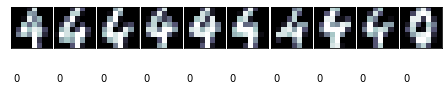

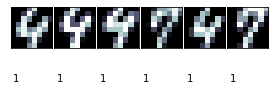

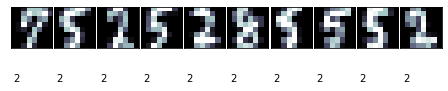

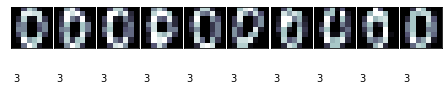

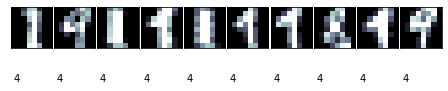

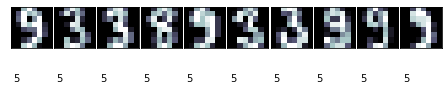

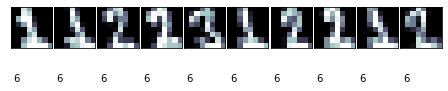

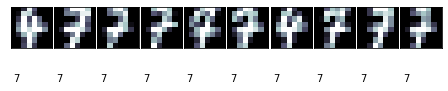

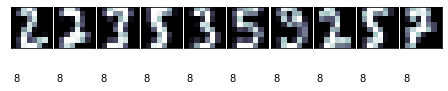

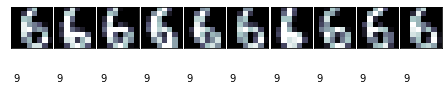

In [67]:
# 输出训练聚类算法的混淆矩阵
y_pred = gm.predict(X_test)
print ("ARI 得分:{:.3}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("同质得分:{:.3} ".format(metrics.homogeneity_score(y_test, y_pred)))
print ("完整性得分: {:.3} ".format(metrics.completeness_score(y_test, y_pred)))
for i in range(10):
     print_cluster(images_test, y_pred, i)
print ("混淆矩阵")
print (metrics.confusion_matrix(y_test, y_pred))

#### (3) 结合主成分分析 (PCA) 法

In [68]:
from sklearn import decomposition

In [69]:
# 主成分分析
pca = decomposition.PCA(n_components=2).fit(X_train) # 考虑 2 个主成分
reduced_X_train = pca.transform(X_train)             # 降维变换

In [70]:
# 设置网格密度，以保证足够的图像质量
h = .01

# 坐标界限
x_min, x_max = reduced_X_train[:, 0].min() - 1, reduced_X_train[:, 0].max() + 1
y_min, y_max = reduced_X_train[:, 1].min() - 1, reduced_X_train[:, 1].max() + 1

# 绘图网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(reduced_X_train)

GaussianMixture(covariance_type='tied', n_components=10, random_state=42)

In [71]:
# 生成聚类的颜色值，用于可视化
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

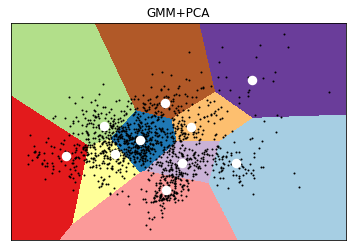

In [72]:
plt.figure(1)  # 画布
plt.clf()      # 清理画布

# 画聚类颜色背景
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

# 画散点
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)

# 获得聚类中心
centroids = gm.means_

# 画聚类中心
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('GMM+PCA')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

## 19.5 总结


- 本讲重点介绍了普遍应用的 `K-平均聚类算法`
- 无监督聚类算法
    - 对无标识样本数据进行分析
    - 可结合主成分分析算法，实现维度缩减
- 其它算法
    - `PA`
    - `MeanShift`
    - `GMM`

### 第19讲 结束

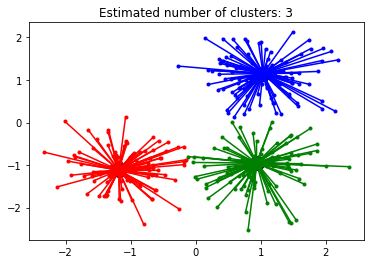

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)
# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [9]:
X

array([[ 1.47504421,  0.9243214 ],
       [-0.02204385, -0.80495334],
       [-1.17671587, -1.80823709],
       [ 0.77223375,  1.00873958],
       [ 1.23283122,  0.23187816],
       [-0.92174673, -0.88390948],
       [ 1.65956844, -1.44120941],
       [ 0.33389417, -1.98431234],
       [-1.27143074, -0.79197498],
       [ 1.33614738,  1.20373092],
       [ 1.47123406, -1.13379737],
       [ 0.94839057,  1.20529925],
       [ 0.65271607,  0.92518273],
       [-0.11980203, -0.79925047],
       [ 1.26163833,  0.91422683],
       [ 0.87899009, -0.24086941],
       [ 0.74124048, -1.48941493],
       [ 0.71534397, -0.86504782],
       [ 0.80238551, -1.57971026],
       [ 0.51444771, -0.8425914 ],
       [ 1.38051886,  1.06083751],
       [ 0.42626567,  0.78108998],
       [ 0.74517391,  0.78096285],
       [ 0.78242322,  1.92463186],
       [ 0.76657723, -1.70845306],
       [ 0.82604393,  1.07817448],
       [ 1.1854125 , -0.9289691 ],
       [-1.15450648, -1.8380019 ],
       [ 1.4002824 ,